In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, Activation
import cv2

In [2]:
df = pd.read_csv("work/output.csv")

In [3]:
def keras_generator(gen_df, batch_size):
    while True:
        x_batch = []
        y_batch = []
        
        for i in range(batch_size):
            img_name, mask = gen_df.sample(1).values[0]
            img = cv2.imread('work/dataset/raster/{}'.format(img_name))
            mask = cv2.imread('work/dataset/mask/{}'.format(mask))
            
            x_batch += [img]
            y_batch += [mask]
            
        x_batch = np.array(x_batch) / 255 
        y_batch = np.array(y_batch)
        
        yield x_batch, y_batch

In [5]:
for x, y in keras_generator(df , 16):
    break

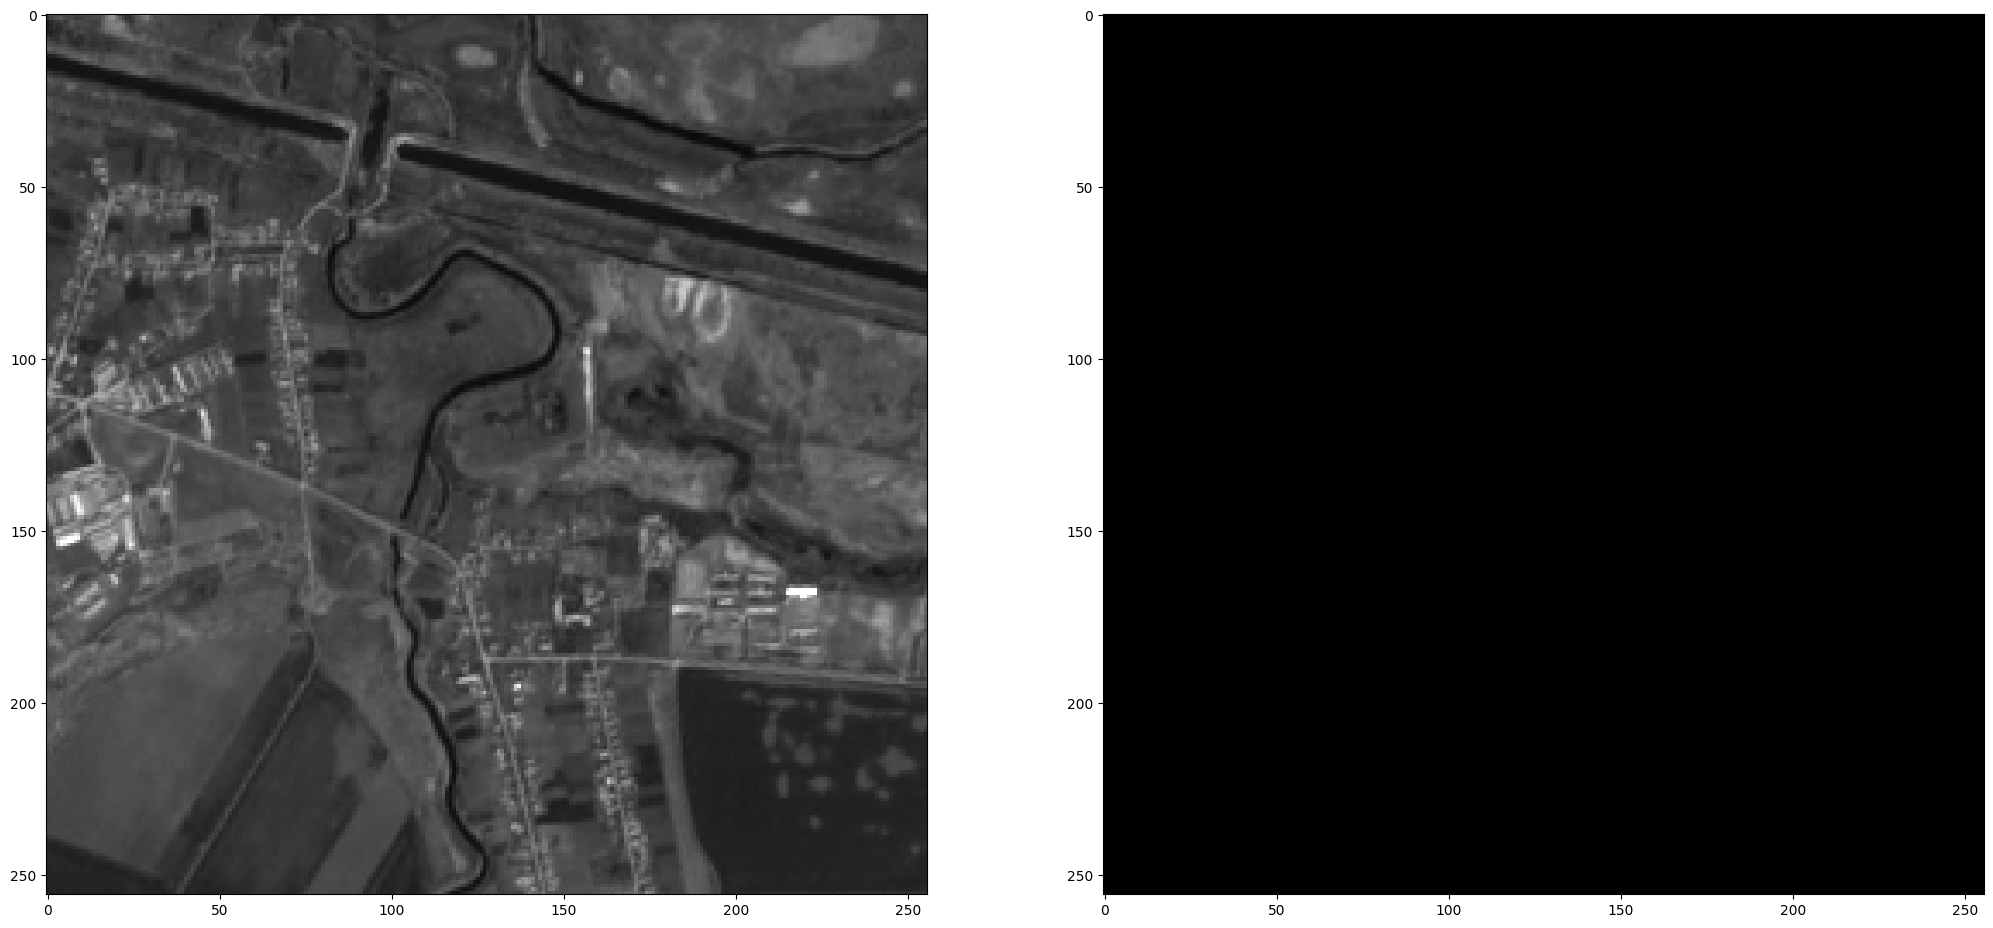

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
axes[0].imshow(x[11])
axes[1].imshow(y[11])